In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
dataset = pd.read_csv("smartwatches.csv");
print(dataset.columns);
print(dataset.head())

Index(['Unnamed: 0', 'Brand', 'Current Price', 'Original Price',
       'Discount Percentage', 'Rating', 'Number OF Ratings', 'Model Name',
       'Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen',
       'Battery Life (Days)', 'Bluetooth', 'Display Size', 'Weight'],
      dtype='object')
   Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046

In [ ]:
missing_counts = dataset.isnull().sum() 
missing_percentage = dataset.isnull().mean() * 100  

print("количество пропусков:\n", missing_counts)
print("\nпроцент пропусков:\n", missing_percentage)

Количество пропусков:
 Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

Процент пропусков:
 Unnamed: 0              0.000000
Brand                   0.000000
Current Price           2.222222
Original Price         16.222222
Discount Percentage    16.222222
Rating                  1.333333
Number OF Ratings      13.111111
Model Name              7.777778
Dial Shape             27.333333
Strap Color            27.333333
Strap Material         15.333333
Touchscreen             8.222222
Battery Life (Days)     7.111111
Bluetooth               1.333333
Display Size            6.666667
Weight          

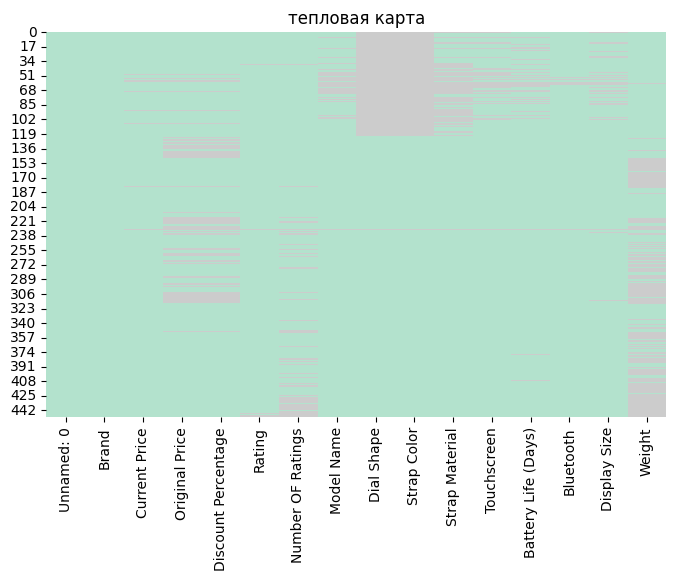

In [ ]:

plt.figure(figsize=(8, 5))
sns.heatmap(dataset.isnull(), cbar=False, cmap="Pastel2")
plt.title("тепловая карта")
plt.show()

<Axes: >

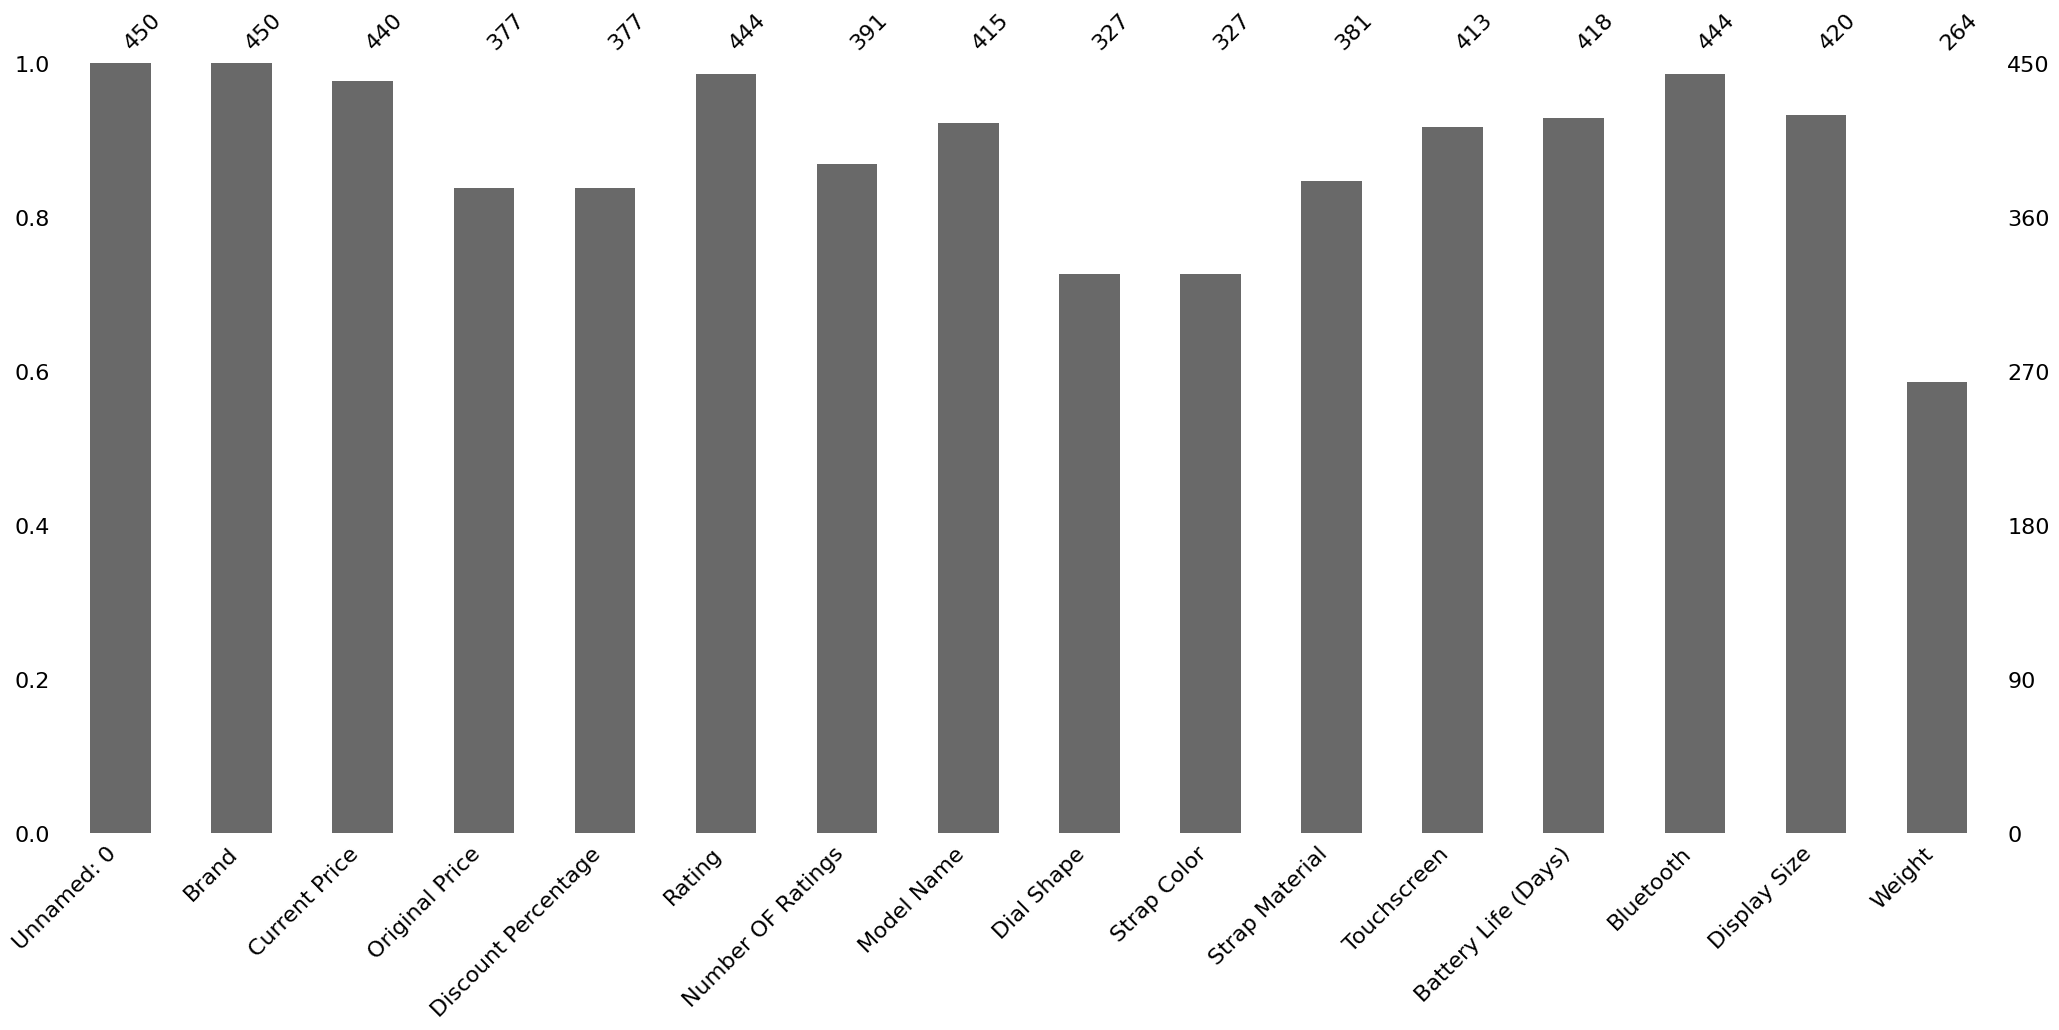

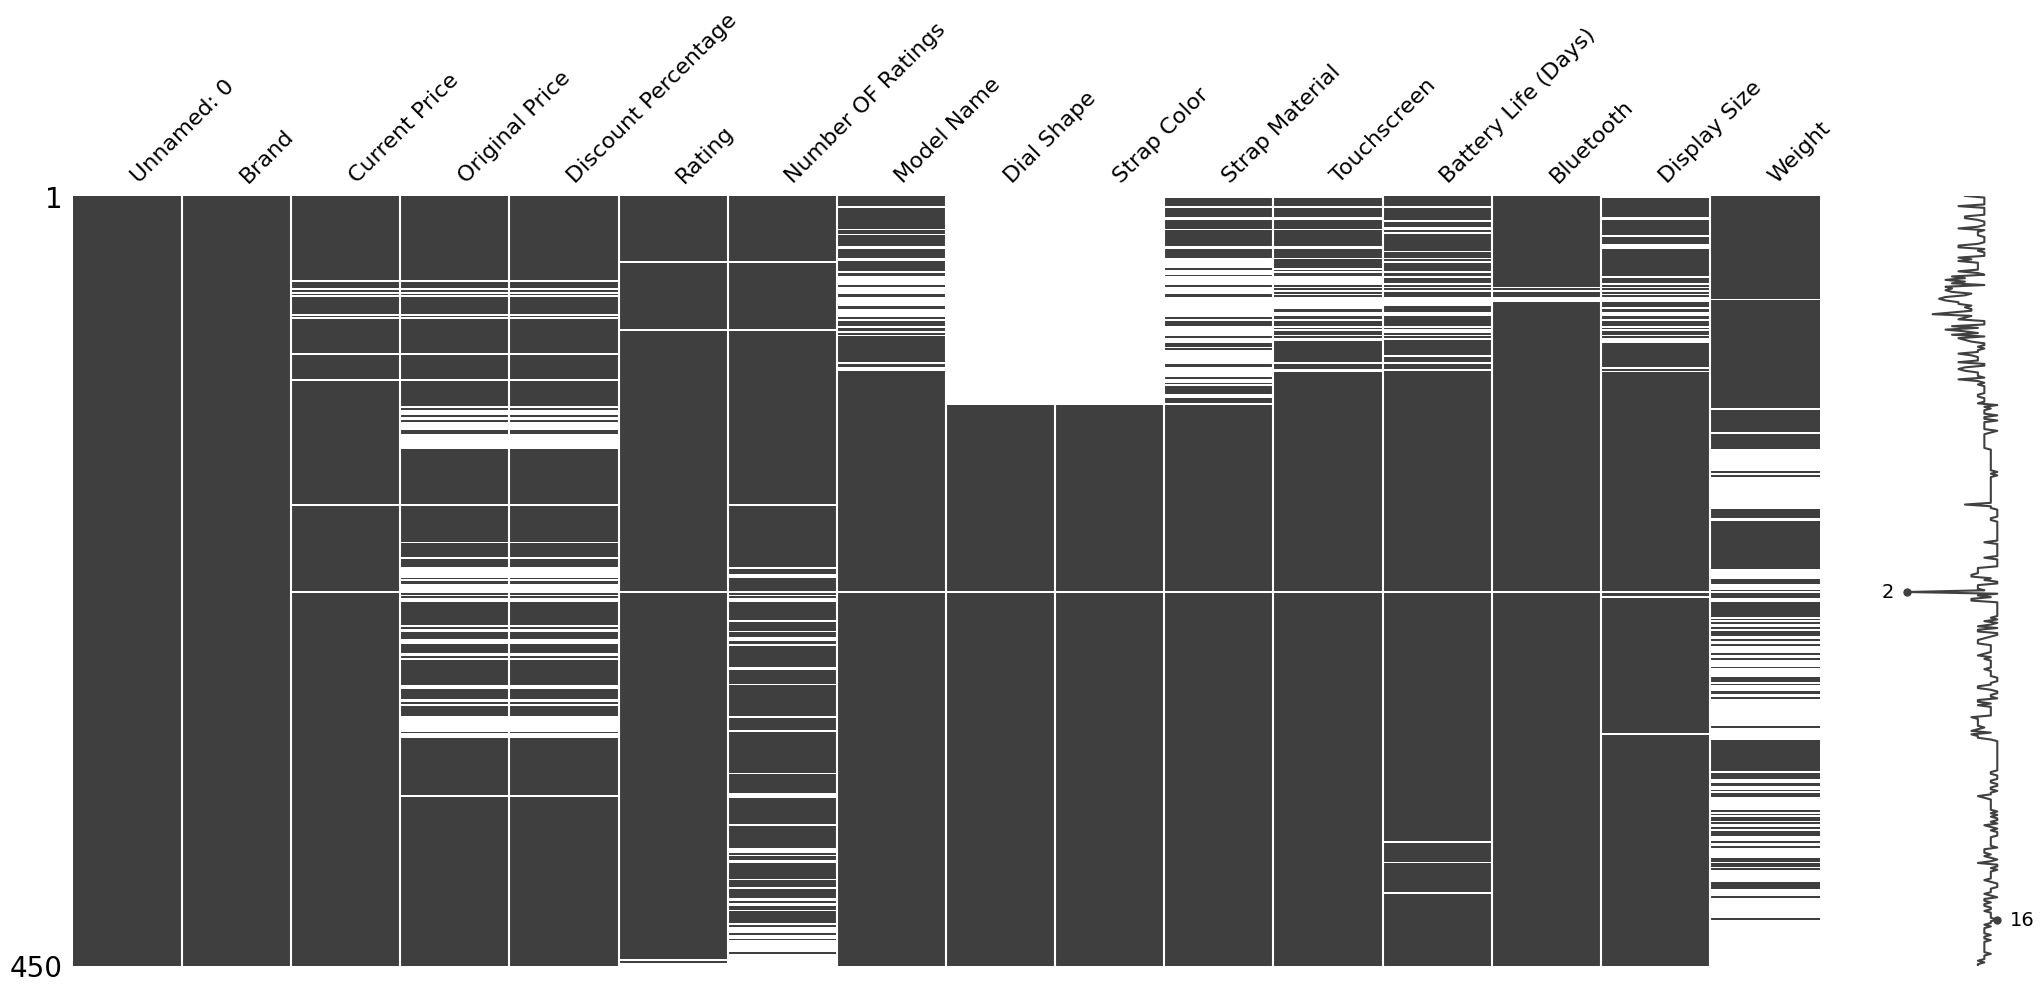

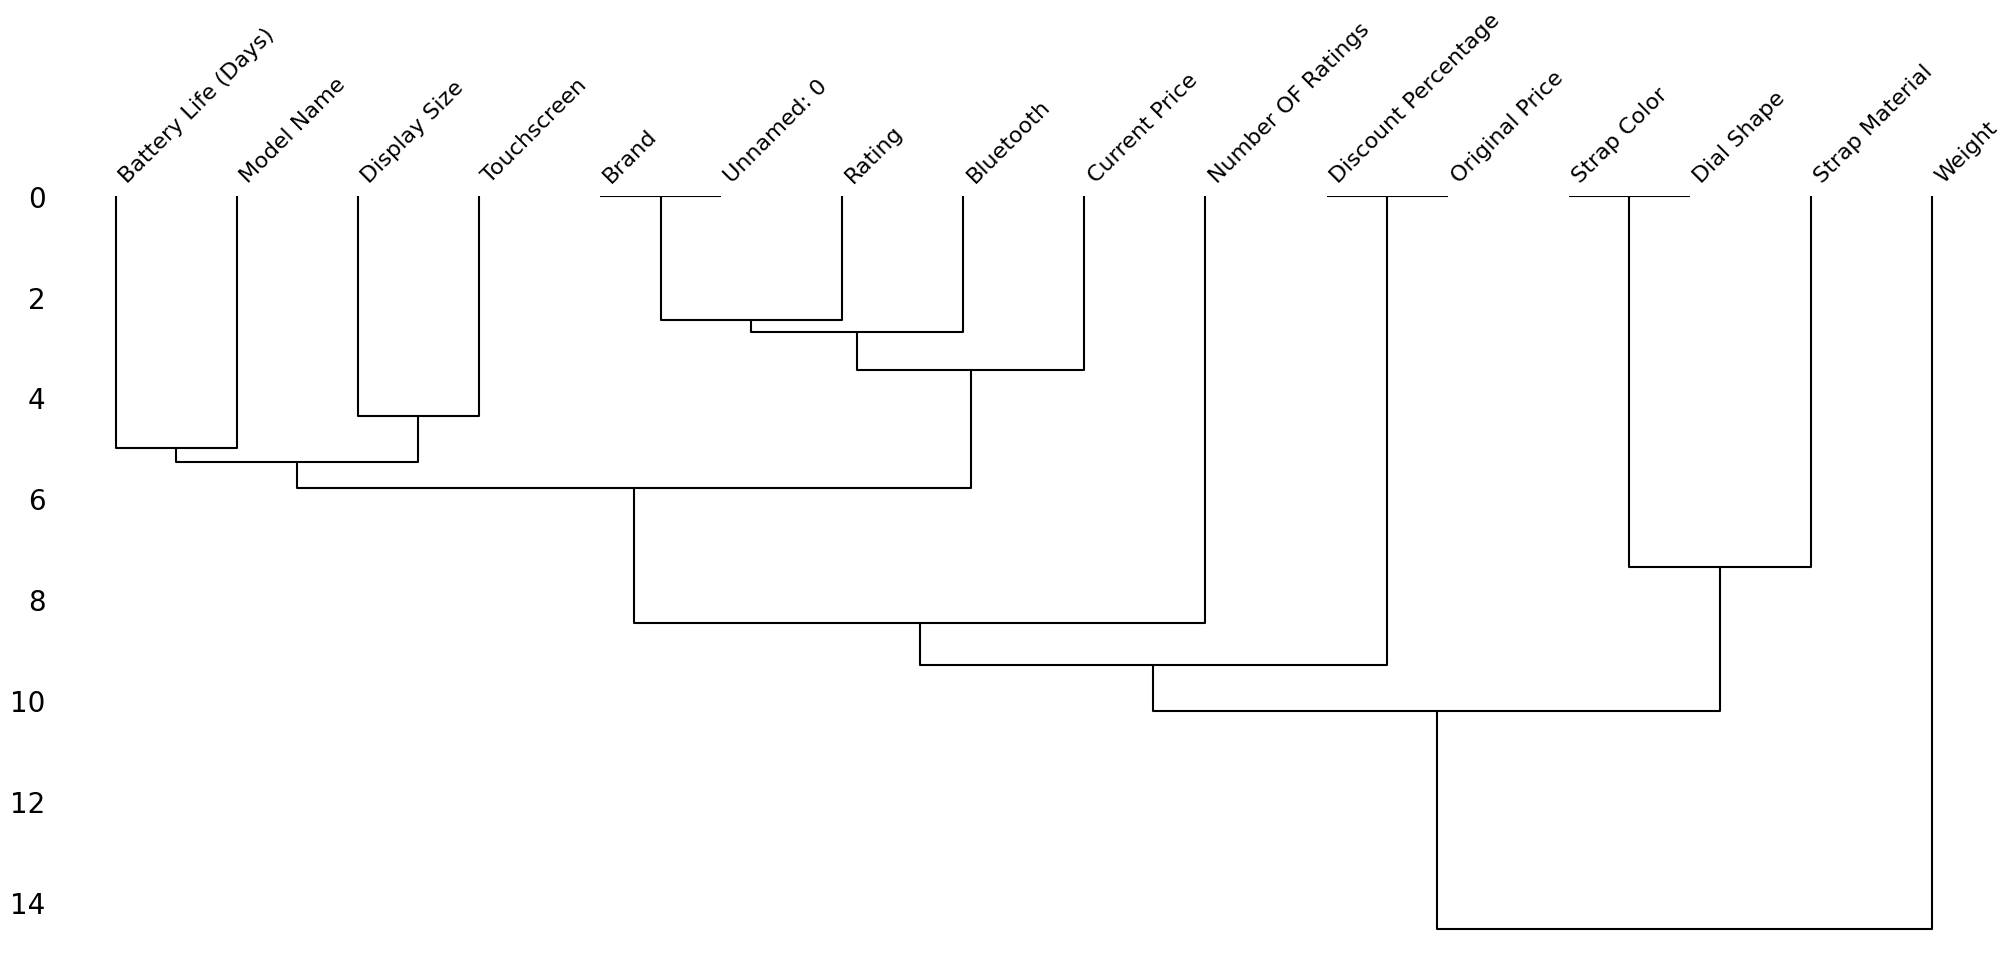

In [11]:
import pandas as pd
import missingno as msno
msno.bar(dataset)

#матрица
msno.matrix(dataset)

#дендрограмма
msno.dendrogram(dataset)

Исключите строки и столбцы с наибольшим количеством пропусков.

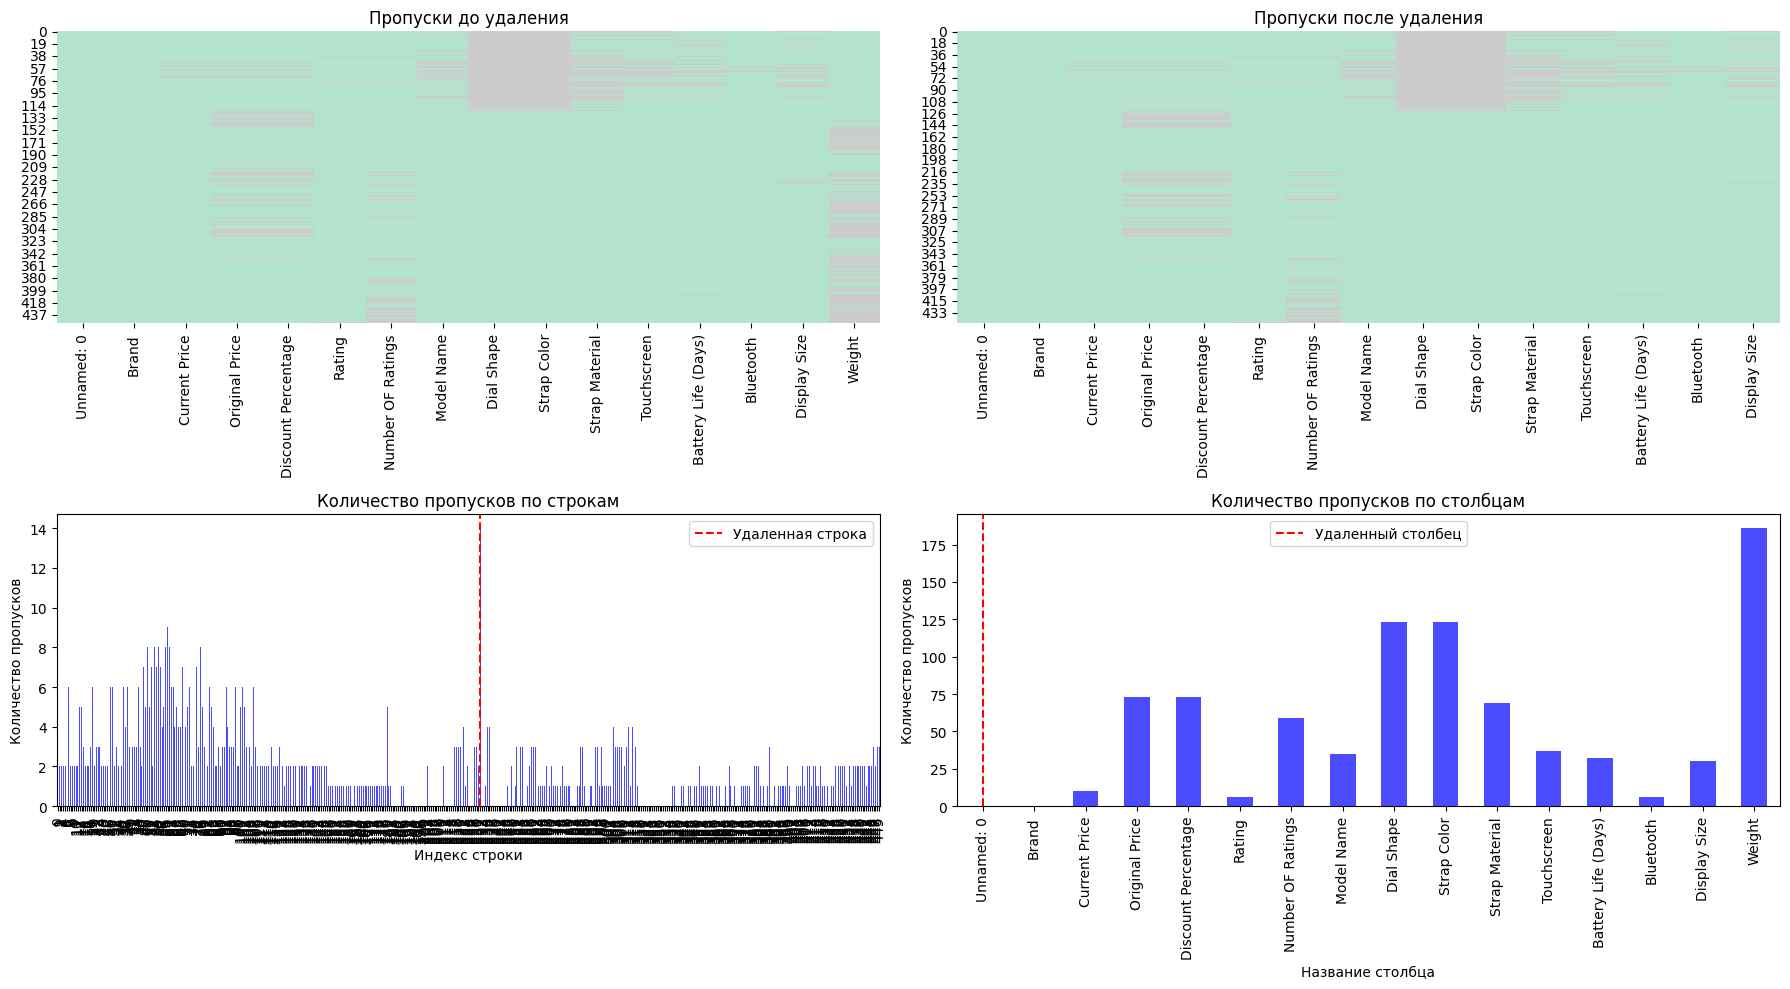

Данные до удаления:
   Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_with_missing = dataset.copy()

# Вычисление количества пропусков в строках и столбцах
missing_by_rows = data_with_missing.isnull().sum(axis=1)  
missing_by_columns = data_with_missing.isnull().sum(axis=0)  

# Определение строки и столбца с наибольшим количеством пропусков
row_to_drop = missing_by_rows.idxmax()  
column_to_drop = missing_by_columns.idxmax() 

# Исключение строки и столбца
data_reduced = data_with_missing.drop(index=row_to_drop, axis=0)  
data_reduced = data_reduced.drop(columns=column_to_drop, axis=1)  

# Визуализация пропусков до и после удаления
plt.figure(figsize=(18, 10))

# Тепловая карта до удаления
plt.subplot(2, 2, 1)
sns.heatmap(data_with_missing.isnull(), cbar=False, cmap="Pastel2")
plt.title("Пропуски до удаления")

# Тепловая карта после удаления
plt.subplot(2, 2, 2)
sns.heatmap(data_reduced.isnull(), cbar=False, cmap="Pastel2")
plt.title("Пропуски после удаления")

# Распределение пропусков по строкам
plt.subplot(2, 2, 3)
missing_by_rows.plot(kind='bar', color='blue', alpha=0.7)
plt.axvline(x=row_to_drop, color='red', linestyle='--', label='Удаленная строка')
plt.title("Количество пропусков по строкам")
plt.xlabel("Индекс строки")
plt.ylabel("Количество пропусков")
plt.legend()

# Распределение пропусков по столбцам
plt.subplot(2, 2, 4)
missing_by_columns.plot(kind='bar', color='blue', alpha=0.7)
plt.axvline(x=column_to_drop, color='red', linestyle='--', label='Удаленный столбец')
plt.title("Количество пропусков по столбцам")
plt.xlabel("Название столбца")
plt.ylabel("Количество пропусков")
plt.legend()

plt.tight_layout()
plt.show()

# Дополнительный вывод
print("Данные до удаления:")
print(data_with_missing.head())
print(f"\nСтрока с наибольшим количеством пропусков: {row_to_drop}")
print(f"Столбец с наибольшим количеством пропусков: {column_to_drop}")

print("\nДанные после удаления:")
print(data_reduced.head())



Произведите замену оставшихся пропусков на логически обоснованные значения

In [28]:
# Замена пропусков в числовых столбцах на среднее значение
numeric_columns = data_reduced.select_dtypes(include=['float64', 'int64']).columns
data_reduced[numeric_columns] = data_reduced[numeric_columns].fillna(data_reduced[numeric_columns].mean())

# Замена пропусков в категориальных столбцах на моду
categorical_columns = data_reduced.select_dtypes(include=['object']).columns
data_reduced[categorical_columns] = data_reduced[categorical_columns].fillna(data_reduced[categorical_columns].mode().iloc[0])

# Вывод итогового результата
print("Данные после замены пропусков:")
print(data_reduced.head())


Данные после замены пропусков:
   Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscre

Проверьте датасет на наличие выбросов,
удалите найденные аномальные записи.

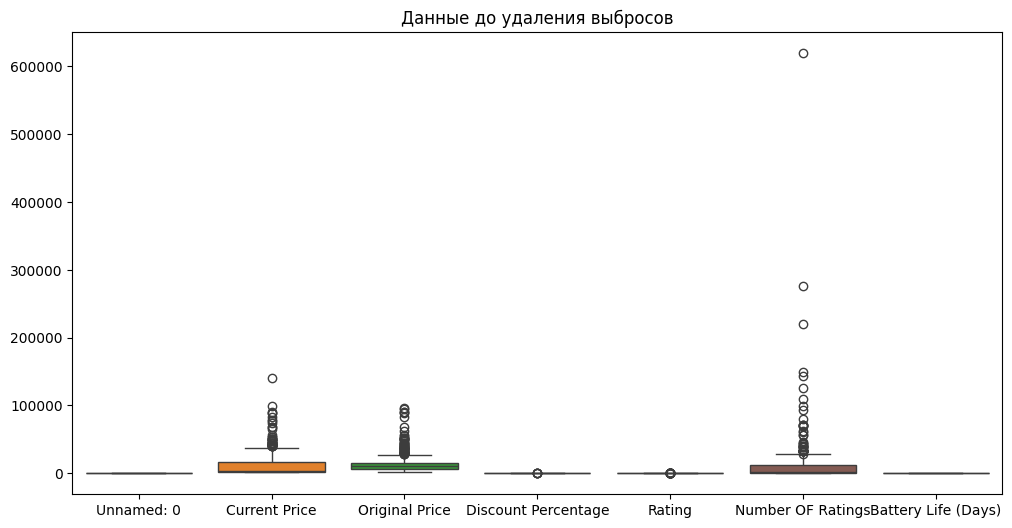

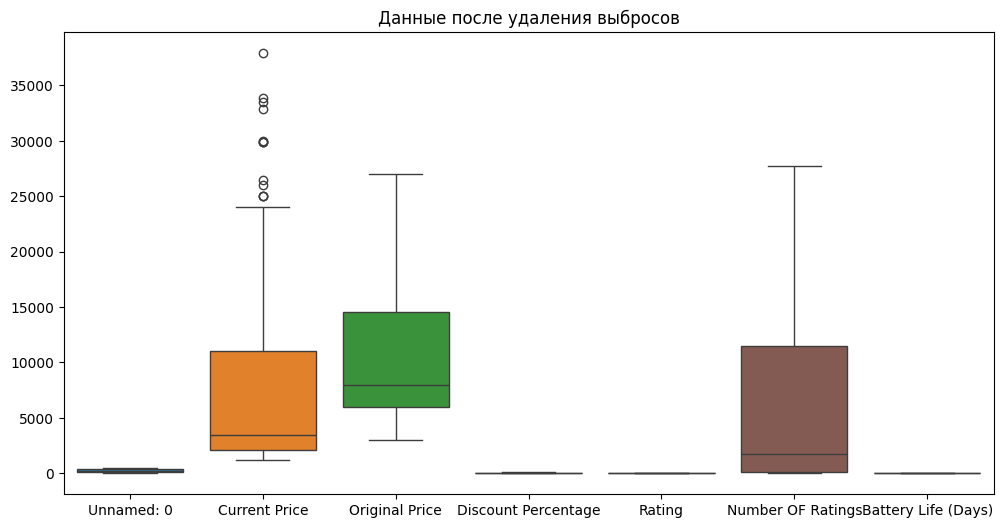

Количество записей до удаления выбросов: 449
Количество записей после удаления выбросов: 281


In [29]:
# Определение функции для удаления выбросов на основе метода IQR
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)  # Первый квартиль
        Q3 = data[column].quantile(0.75)  # Третий квартиль
        IQR = Q3 - Q1  # Межквартильный размах

        # Границы для выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Фильтрация данных
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Выделение числовых столбцов
numeric_columns = data_reduced.select_dtypes(include=['float64', 'int64']).columns

# Удаление выбросов
data_no_outliers = remove_outliers_iqr(data_reduced, numeric_columns)

# Визуализация результатов
import seaborn as sns
import matplotlib.pyplot as plt

# До удаления выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_reduced[numeric_columns])
plt.title("Данные до удаления выбросов")
plt.show()

# После удаления выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers[numeric_columns])
plt.title("Данные после удаления выбросов")
plt.show()

# Вывод информации
print(f"Количество записей до удаления выбросов: {data_reduced.shape[0]}")
print(f"Количество записей после удаления выбросов: {data_no_outliers.shape[0]}")


Приведите категориальные параметры к числовому виду (это могут быть названия
стран, дни недели, марки машин, другие признаки, записанные текстом).

In [33]:
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

(   Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
 0           0       noise        82990.0         89900.0             7.686318   
 1           1  fire-boltt         3799.0         16999.0            77.651627   
 2           2        boat         1999.0          7990.0            74.981227   
 3           3  fire-boltt         1799.0         19999.0            91.004550   
 4           4       noise         1599.0          4999.0            68.013603   
 
    Rating  Number OF Ratings                              Model Name  \
 0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
 1     4.3            20788.0                                  BSW046   
 2     3.8            21724.0                               Wave Call   
 3     4.3            13244.0                                  BSW053   
 4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   
 
   Dial Shape Strap Color Strap Material Touchscreen  Battery Life

In [34]:

# Преобразование категориальных данных в числовой вид с использованием One-Hot Encoding
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Применение One-Hot Encoding
data_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

# Проверим первые строки преобразованного датасета
data_encoded.head()


,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Brand_ambrane,Brand_apple,Brand_boat,...,Display Size_4.3 inches,Display Size_4.4 inches,Display Size_4.5 inches,Display Size_4.6 inches,Display Size_45.0 inches,Display Size_6.9 inches,Weight_35 - 50 g,Weight_50 - 75 g,Weight_75g +,Weight_<= 20 g
0,0,82990.0,89900.0,7.686318,4.0,65.0,8.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,3799.0,16999.0,77.651627,4.3,20788.0,3.5,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2,1999.0,7990.0,74.981227,3.8,21724.0,8.0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,3,1799.0,19999.0,91.004550,4.3,13244.0,3.5,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4,1599.0,4999.0,68.013603,4.1,13901.0,8.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Инициализация Min-Max Scaler
scaler = MinMaxScaler()

# Применение нормализации ко всем числовым столбцам
numeric_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_normalized = data_encoded.copy()
data_normalized[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

# Проверим первые строки нормализованных данных
data_normalized.head()


,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Brand_ambrane,Brand_apple,Brand_boat,...,Display Size_4.3 inches,Display Size_4.4 inches,Display Size_4.5 inches,Display Size_4.6 inches,Display Size_45.0 inches,Display Size_6.9 inches,Weight_35 - 50 g,Weight_50 - 75 g,Weight_75g +,Weight_<= 20 g
0,0.000000,0.589311,0.931483,0.511883,0.750,0.000103,0.341176,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.002227,0.018733,0.161844,0.921772,0.825,0.033575,0.129412,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.004454,0.005764,0.066733,0.906128,0.700,0.035086,0.341176,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.006682,0.004323,0.193516,1.000000,0.825,0.021390,0.129412,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0.008909,0.002882,0.035156,0.865308,0.775,0.022451,0.341176,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [40]:
# Сохранение нормализованного датасета в файл
output_file_path = '/content/smartwatches_normalized.csv'
data_normalized.to_csv(output_file_path, index=False)
output_file_path
files.download(output_file_path)

NameError: name 'files' is not defined